<a href="https://colab.research.google.com/github/yjyjy131/Study_Deep_Learning/blob/main/Deep-Learning-Zero-To-All-PyTorch/lab_11_4_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def minmax_scaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [3]:
def build_dataset(time_series, seq_length):
  dataX = []
  dataY = []
  for i in range(0, len(time_series) - seq_length):
    _x = time_series[i:i+seq_length, :]
    _y = time_series[i+seq_length, [-1]]
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)

In [4]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [5]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
# 순서 거꾸로
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size-seq_length:]

train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

In [7]:
class Net(torch.nn.Module):
  def __init__ (self, input_dim, hidden_dim, output_dim, layers) :
    super(Net, self).__init__()
    # batch_first : 미니 배치 차원을 맨 앞으로 하여 데이터를 불러올 것인지 여부
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:, -1])
    return x

net = Net(data_dim, hidden_dim, output_dim, 1)

In [8]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [10]:
for i in range(iterations):
  optimizer.zero_grad()
  outputs = net(trainX_tensor)
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(i, loss.item())

0 0.15287303924560547
1 0.12665648758411407
2 0.10617399215698242
3 0.089788056910038
4 0.07660329341888428
5 0.06612759828567505
6 0.05814487487077713
7 0.05261402204632759
8 0.04949155077338219
9 0.04842163622379303
10 0.04844147339463234
11 0.04813382402062416
12 0.04631403088569641
13 0.04260695353150368
14 0.037434227764606476
15 0.03162955865263939
16 0.026026757434010506
17 0.02118079550564289
18 0.017278779298067093
19 0.014187782071530819
20 0.011578530073165894
21 0.009118666872382164
22 0.006703043356537819
23 0.004619814455509186
24 0.0034603956155478954
25 0.003669493133202195
26 0.005035818088799715
27 0.0067131672985851765
28 0.007842084392905235
29 0.00805208645761013
30 0.007455404847860336
31 0.006404014769941568
32 0.005271781701594591
33 0.00432672630995512
34 0.0036836464423686266
35 0.00332145974971354
36 0.0031457978766411543
37 0.003061912953853607
38 0.0030192730482667685
39 0.003013043198734522
40 0.0030576097778975964
41 0.00315762753598392
42 0.0032934257760

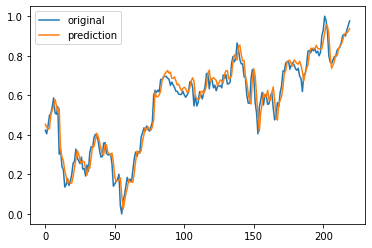

In [11]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()